In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("heart.csv")

In [9]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [21]:
df.describe(include ='O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Encoding

In [24]:
data = pd.get_dummies(df.Sex,prefix='Gender', drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns ='Sex', inplace = True)

In [26]:
data = pd.get_dummies(df.ChestPainType ,prefix='ChestPain', drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns ='ChestPainType' ,inplace = True)

In [28]:
data = pd.get_dummies(df.RestingECG,prefix='RestingECG', drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns ='RestingECG', inplace = True)

In [30]:
data = pd.get_dummies(df.ExerciseAngina,prefix='ExerciseAngina', drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns ='ExerciseAngina', inplace = True)

In [32]:
data = pd.get_dummies(df.ST_Slope,prefix='ST_Slope', drop_first=True)
df=pd.concat([data,df],axis=1)
df.drop(columns ='ST_Slope', inplace = True)

In [34]:
df

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


## Outlier Handling

In [37]:
from scipy import stats

In [38]:
stats.iqr(df.Age)

13.0

In [39]:
IQR_Age = stats.iqr(df.Age)

In [40]:
import numpy as np

In [41]:
Q1_Age = np.percentile(df.Age,25)
Q3_Age = np.percentile(df.Age,75)
print(Q1_Age)
print(Q3_Age)

47.0
60.0


In [49]:
Q1_Age - 1.5*(IQR_Age)

27.5

In [51]:
Q3_Age + 1.5*(IQR_Age)

79.5

In [53]:
LB_Age = Q1_Age - 1.5*(IQR_Age)
UB_Age = Q3_Age + 1.5*(IQR_Age)

In [55]:
df[(df.Age>LB_Age)&(df.Age<UB_Age)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [57]:
df.loc[df.Age>UB_Age,'Age']

Series([], Name: Age, dtype: int64)

In [59]:
df.loc[df.Age<LB_Age,'Age']

Series([], Name: Age, dtype: int64)

In [61]:
stats.iqr(df.RestingBP)

20.0

In [65]:
IQR_RestingBP = stats.iqr(df.RestingBP)

In [67]:
Q1_RestingBP = np.percentile(df.RestingBP,25)
Q3_RestingBP = np.percentile(df.RestingBP,75)
print(Q1_RestingBP)
print(Q3_RestingBP)

120.0
140.0


In [69]:
LB_RestingBP = Q1_RestingBP - 1.5*(IQR_RestingBP)
UB_RestingBP = Q3_RestingBP + 1.5*(IQR_RestingBP)

In [71]:
LB_RestingBP

90.0

In [73]:
UB_RestingBP

170.0

In [75]:
df[(df.RestingBP>LB_RestingBP)&(df.RestingBP<UB_RestingBP)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [77]:
df.loc[df.RestingBP>UB_RestingBP,'RestingBP']

109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
365    200
372    185
399    200
411    180
423    180
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64

In [85]:
df.loc[df.RestingBP<LB_RestingBP,'RestingBP']

314    80
449     0
Name: RestingBP, dtype: int64

In [87]:
import seaborn as sns

<Axes: xlabel='RestingBP'>

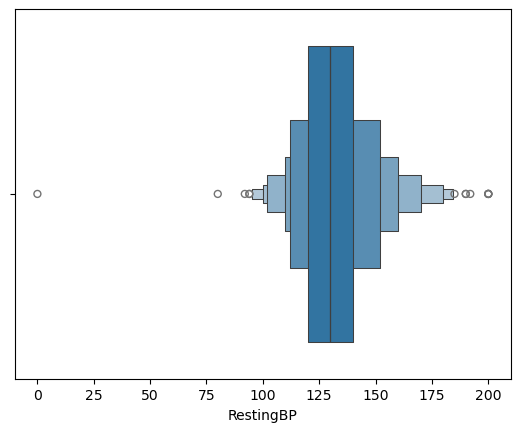

In [89]:
sns.boxenplot(x= df.RestingBP)

In [91]:
((918-876)/918)*100

4.57516339869281

In [93]:
df.RestingBP.median()

130.0

In [97]:
df.loc[df.RestingBP>UB_RestingBP,'RestingBP'] = 130

In [99]:
df.loc[df.RestingBP<LB_RestingBP,'RestingBP'] = 130

In [101]:
df.loc[df.RestingBP>UB_RestingBP,'RestingBP']

Series([], Name: RestingBP, dtype: int64)

In [105]:
df.loc[df.RestingBP<LB_RestingBP,'RestingBP']

Series([], Name: RestingBP, dtype: int64)

<Axes: xlabel='RestingBP'>

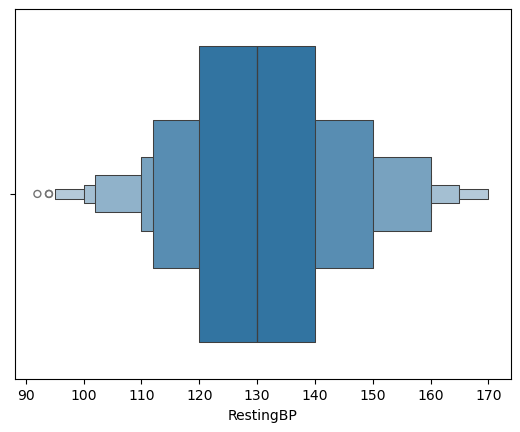

In [107]:
sns.boxenplot(x=df.RestingBP)

In [109]:
stats.iqr(df.Cholesterol)

93.75

In [111]:
IQR_Cholesterol= stats.iqr(df.Cholesterol)

In [113]:
Q1_Cholesterol = np.percentile(df.Cholesterol,25)
Q3_Cholesterol= np.percentile(df.Cholesterol,75)
print(Q1_Cholesterol)
print(Q3_Cholesterol)

173.25
267.0


In [115]:
LB_Cholesterol = Q1_Cholesterol - 1.5*(IQR_Cholesterol)
UB_Cholesterol= Q3_Cholesterol + 1.5*(IQR_Cholesterol)


In [117]:
LB_Cholesterol 

32.625

In [119]:
UB_Cholesterol 

407.625

In [121]:
df[(df.Cholesterol>LB_Cholesterol)&(df.Cholesterol<UB_Cholesterol)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [123]:
((918-735)/918)*100

19.934640522875817

The percentage of outliers is more than 5% so we don't handle outliers in cholestoral column

In [126]:
stats.iqr(df.FastingBS)

0.0

In [128]:
IQR_FastingBS= stats.iqr(df.FastingBS)

In [130]:
Q1_FastingBS= np.percentile(df.FastingBS,25)
Q3_FastingBS= np.percentile(df.FastingBS,75)
print(Q1_FastingBS)
print(Q3_FastingBS)

0.0
0.0


In [146]:
LB_FastingBS = Q1_FastingBS- 1.5*(IQR_FastingBS)
UB_FastingBS= Q3_FastingBS+ 1.5*(IQR_FastingBS)


In [148]:
LB_FastingBS

0.0

In [152]:
UB_FastingBS

0.0

In [154]:
df[(df.FastingBS>LB_FastingBS)&(df.FastingBS<UB_FastingBS)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease


In [156]:
stats.iqr(df.MaxHR)

36.0

In [158]:
IQR_MaxHR= stats.iqr(df.MaxHR)

In [160]:
Q1_MaxHR = np.percentile(df.MaxHR,25)
Q3_MaxHR= np.percentile(df.MaxHR,75)
print(Q1_MaxHR)
print(Q3_MaxHR)

120.0
156.0


In [162]:
LB_MaxHR = Q1_MaxHR - 1.5*(IQR_MaxHR)
UB_MaxHR= Q3_MaxHR + 1.5*(IQR_MaxHR)


In [164]:
LB_MaxHR

66.0

In [166]:
UB_MaxHR

210.0

In [168]:
df[(df.MaxHR>LB_MaxHR)&(df.MaxHR<UB_MaxHR)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [170]:
((918-916)/918)*100

0.2178649237472767

In [172]:
df.loc[df.MaxHR>UB_MaxHR,'MaxHR']

Series([], Name: MaxHR, dtype: int64)

In [174]:
df.loc[df.MaxHR<LB_MaxHR,'MaxHR']

370    63
390    60
Name: MaxHR, dtype: int64

<Axes: xlabel='MaxHR'>

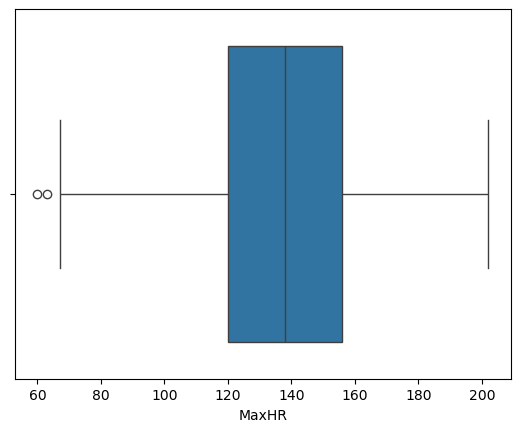

In [176]:
sns.boxplot(x = df.MaxHR)

In [178]:
df.MaxHR.median()

138.0

In [180]:
df.loc[df.MaxHR<LB_MaxHR,'MaxHR'] = 138

<Axes: xlabel='MaxHR'>

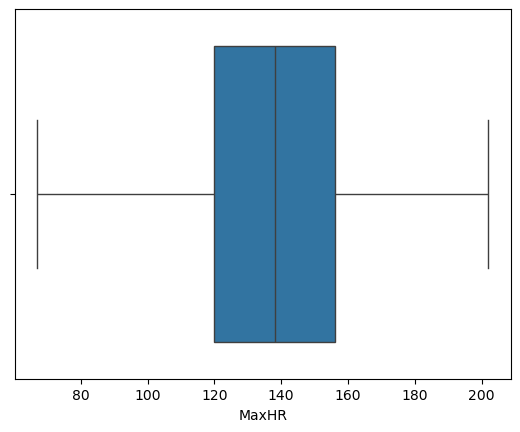

In [182]:
sns.boxplot(x=df.MaxHR)

In [184]:
stats.iqr(df.Oldpeak)

1.5

In [186]:
IQR_Oldpeak= stats.iqr(df.Oldpeak)

In [188]:
Q1_Oldpeak = np.percentile(df.Oldpeak,25)
Q3_Oldpeak= np.percentile(df.Oldpeak,75)
print(Q1_Oldpeak)
print(Q3_Oldpeak)

0.0
1.5


In [190]:
LB_Oldpeak = Q1_Oldpeak - 1.5*(IQR_Oldpeak)
UB_Oldpeak= Q3_Oldpeak+ 1.5*(IQR_Oldpeak)


In [192]:
LB_Oldpeak

-2.25

In [194]:
UB_Oldpeak

3.75

In [196]:
df[(df.Oldpeak>LB_Oldpeak)&(df.Oldpeak<UB_Oldpeak)]

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,40,140,289,0,172,0.0,0
1,True,False,False,True,False,False,True,False,False,49,160,180,0,156,1.0,1
2,False,True,False,False,True,True,False,False,True,37,130,283,0,98,0.0,0
3,True,False,True,True,False,False,False,False,False,48,138,214,0,108,1.5,1
4,False,True,False,True,False,False,True,False,True,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,45,110,264,0,132,1.2,1
914,True,False,False,True,False,False,False,False,True,68,144,193,1,141,3.4,1
915,True,False,True,True,False,False,False,False,True,57,130,131,0,115,1.2,1
916,True,False,False,False,False,True,False,False,False,57,130,236,0,174,0.0,1


In [198]:
((918-902)/918)*100

1.7429193899782136

In [200]:
df.loc[df.Oldpeak>UB_Oldpeak,'Oldpeak']

68     4.0
166    5.0
500    4.0
521    4.0
537    4.0
559    4.0
624    4.0
702    4.2
732    4.0
771    5.6
775    3.8
791    4.2
850    6.2
900    4.4
908    4.0
Name: Oldpeak, dtype: float64

In [202]:
df.loc[df.Oldpeak<LB_Oldpeak,'Oldpeak']

324   -2.6
Name: Oldpeak, dtype: float64

<Axes: xlabel='Oldpeak'>

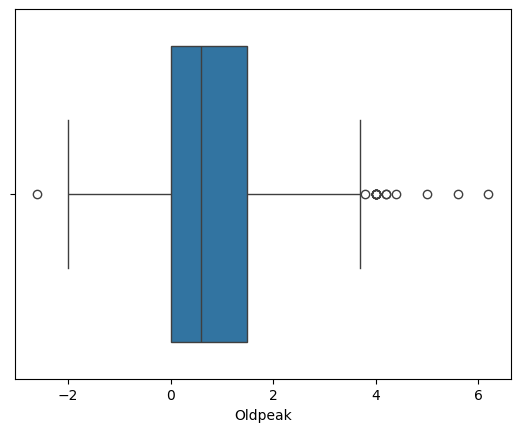

In [204]:
sns.boxplot(x = df.Oldpeak)

In [206]:
df.Oldpeak.median()

0.6

In [208]:
df.loc[df.Oldpeak>UB_Oldpeak,'Oldpeak'] = 0.6

In [210]:
df.loc[df.Oldpeak<LB_Oldpeak,'Oldpeak'] = 0.6

<Axes: xlabel='Oldpeak'>

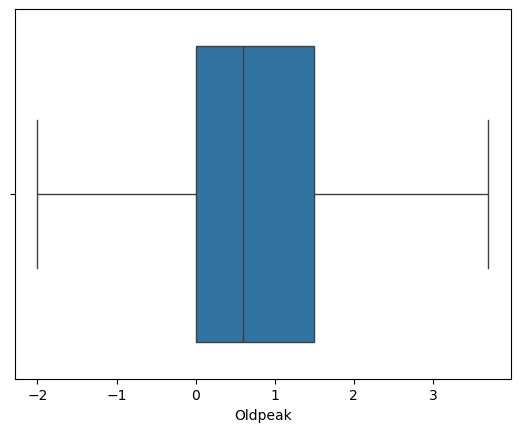

In [212]:
sns.boxplot(x = df.Oldpeak)

### Scaling

In [215]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[['Age','RestingBP','Cholesterol','MaxHR']] = scale.fit_transform(df[['Age','RestingBP','Cholesterol','MaxHR']])

In [216]:
df

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,True,False,True,False,True,False,False,True,0.244898,0.615385,0.479270,0,0.777778,0.0,0
1,True,False,False,True,False,False,True,False,False,0.428571,0.871795,0.298507,0,0.659259,1.0,1
2,False,True,False,False,True,True,False,False,True,0.183673,0.487179,0.469320,0,0.229630,0.0,0
3,True,False,True,True,False,False,False,False,False,0.408163,0.589744,0.354892,0,0.303704,1.5,1
4,False,True,False,True,False,False,True,False,True,0.530612,0.743590,0.323383,0,0.407407,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,0.346939,0.230769,0.437811,0,0.481481,1.2,1
914,True,False,False,True,False,False,False,False,True,0.816327,0.666667,0.320066,1,0.548148,3.4,1
915,True,False,True,True,False,False,False,False,True,0.591837,0.487179,0.217247,0,0.355556,1.2,1
916,True,False,False,False,False,True,False,False,False,0.591837,0.487179,0.391376,0,0.792593,0.0,1


In [219]:
## Target and Predictor sepration
X = df.iloc[:,:-1]
y= df.HeartDisease

In [221]:
X

,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_Y,RestingECG_Normal,RestingECG_ST,ChestPain_ATA,ChestPain_NAP,ChestPain_TA,Gender_M,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,False,True,False,True,False,True,False,False,True,0.244898,0.615385,0.479270,0,0.777778,0.0
1,True,False,False,True,False,False,True,False,False,0.428571,0.871795,0.298507,0,0.659259,1.0
2,False,True,False,False,True,True,False,False,True,0.183673,0.487179,0.469320,0,0.229630,0.0
3,True,False,True,True,False,False,False,False,False,0.408163,0.589744,0.354892,0,0.303704,1.5
4,False,True,False,True,False,False,True,False,True,0.530612,0.743590,0.323383,0,0.407407,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,True,False,False,True,False,False,False,True,True,0.346939,0.230769,0.437811,0,0.481481,1.2
914,True,False,False,True,False,False,False,False,True,0.816327,0.666667,0.320066,1,0.548148,3.4
915,True,False,True,True,False,False,False,False,True,0.591837,0.487179,0.217247,0,0.355556,1.2
916,True,False,False,False,False,True,False,False,False,0.591837,0.487179,0.391376,0,0.792593,0.0


In [223]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [227]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=7)

### Model Creation

In [230]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

### Model Evaluation

In [233]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.782608695652174

In [235]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        84
           1       0.82      0.77      0.79       100

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.78      0.78       184



[Text(0.5951144171099291, 0.96875, 'x[1] <= 0.5\ngini = 0.492\nsamples = 734\nvalue = [320, 414]'),
 Text(0.3914699689716312, 0.90625, 'x[13] <= 0.619\ngini = 0.291\nsamples = 424\nvalue = [75, 349]'),
 Text(0.21733710106382978, 0.84375, 'x[8] <= 0.5\ngini = 0.211\nsamples = 350\nvalue = [42, 308]'),
 Text(0.05673758865248227, 0.78125, 'x[2] <= 0.5\ngini = 0.458\nsamples = 45\nvalue = [16.0, 29.0]'),
 Text(0.028368794326241134, 0.71875, 'x[10] <= 0.538\ngini = 0.495\nsamples = 20\nvalue = [11, 9]'),
 Text(0.014184397163120567, 0.65625, 'x[13] <= 0.226\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.0070921985815602835, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.02127659574468085, 0.59375, 'x[13] <= 0.611\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.014184397163120567, 0.53125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.028368794326241134, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0425531914893617, 0.65625, 'x[4] <= 0.5\

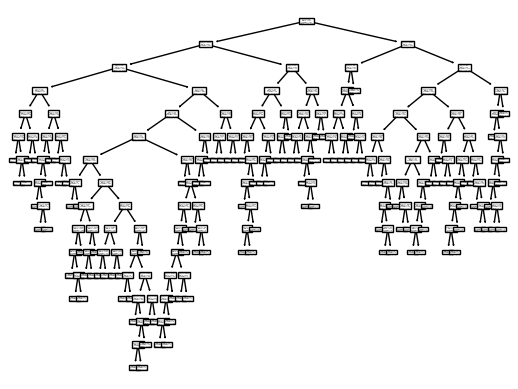

In [237]:
## tree structure
from sklearn import tree
tree.plot_tree(model)

In [238]:
y_pred_train = model.predict(X_train)
accuracy_score(y_pred_train,y_train)


1.0

In [239]:
model = DecisionTreeClassifier(max_depth=3)  # we change max_depth to get gen
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [240]:
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8858695652173914

In [241]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        85
           1       0.91      0.87      0.89        99

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



[Text(0.5, 0.875, 'x[1] <= 0.5\ngini = 0.492\nsamples = 734\nvalue = [320, 414]'),
 Text(0.25, 0.625, 'x[13] <= 0.619\ngini = 0.291\nsamples = 424\nvalue = [75, 349]'),
 Text(0.125, 0.375, 'x[8] <= 0.5\ngini = 0.211\nsamples = 350\nvalue = [42, 308]'),
 Text(0.0625, 0.125, 'gini = 0.458\nsamples = 45\nvalue = [16.0, 29.0]'),
 Text(0.1875, 0.125, 'gini = 0.156\nsamples = 305\nvalue = [26, 279]'),
 Text(0.375, 0.375, 'x[6] <= 0.5\ngini = 0.494\nsamples = 74\nvalue = [33, 41]'),
 Text(0.3125, 0.125, 'gini = 0.453\nsamples = 49\nvalue = [17.0, 32.0]'),
 Text(0.4375, 0.125, 'gini = 0.461\nsamples = 25\nvalue = [16, 9]'),
 Text(0.75, 0.625, 'x[11] <= 0.083\ngini = 0.331\nsamples = 310\nvalue = [245, 65]'),
 Text(0.625, 0.375, 'x[12] <= 0.5\ngini = 0.394\nsamples = 37\nvalue = [10, 27]'),
 Text(0.5625, 0.125, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]'),
 Text(0.875, 0.375, 'x[2] <= 0.5\ngini = 0.24\nsamples = 273\nvalue = [

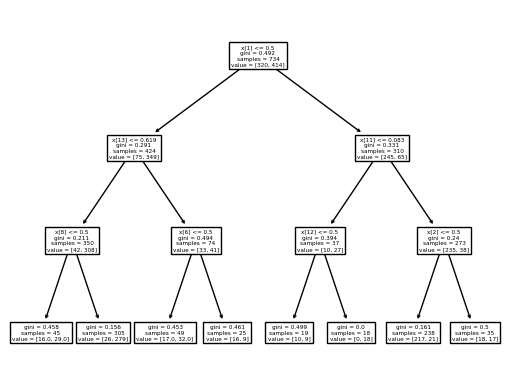

In [242]:
from sklearn import tree
tree.plot_tree(model)


In [247]:
y_pred_train = model.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.8433242506811989

### Feature Selection

In [257]:
import numpy as np
import matplotlib.pyplot as plt

In [263]:
imp = model.feature_importances_
indices = np.argsort(imp)
feature = X_train.columns

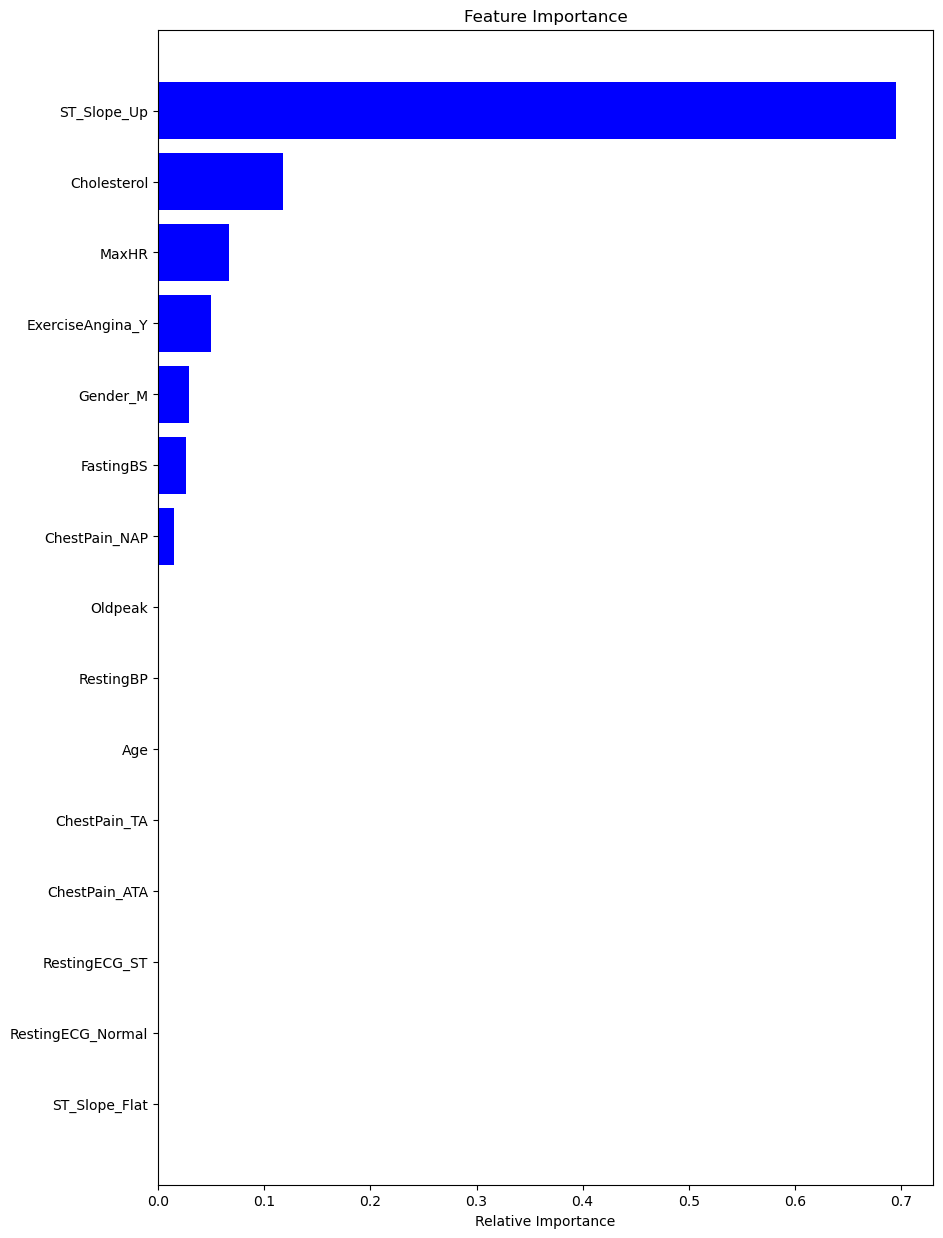

In [265]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp[indices], align = 'center',color = 'Blue')
plt.yticks(range(len(indices)),[feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

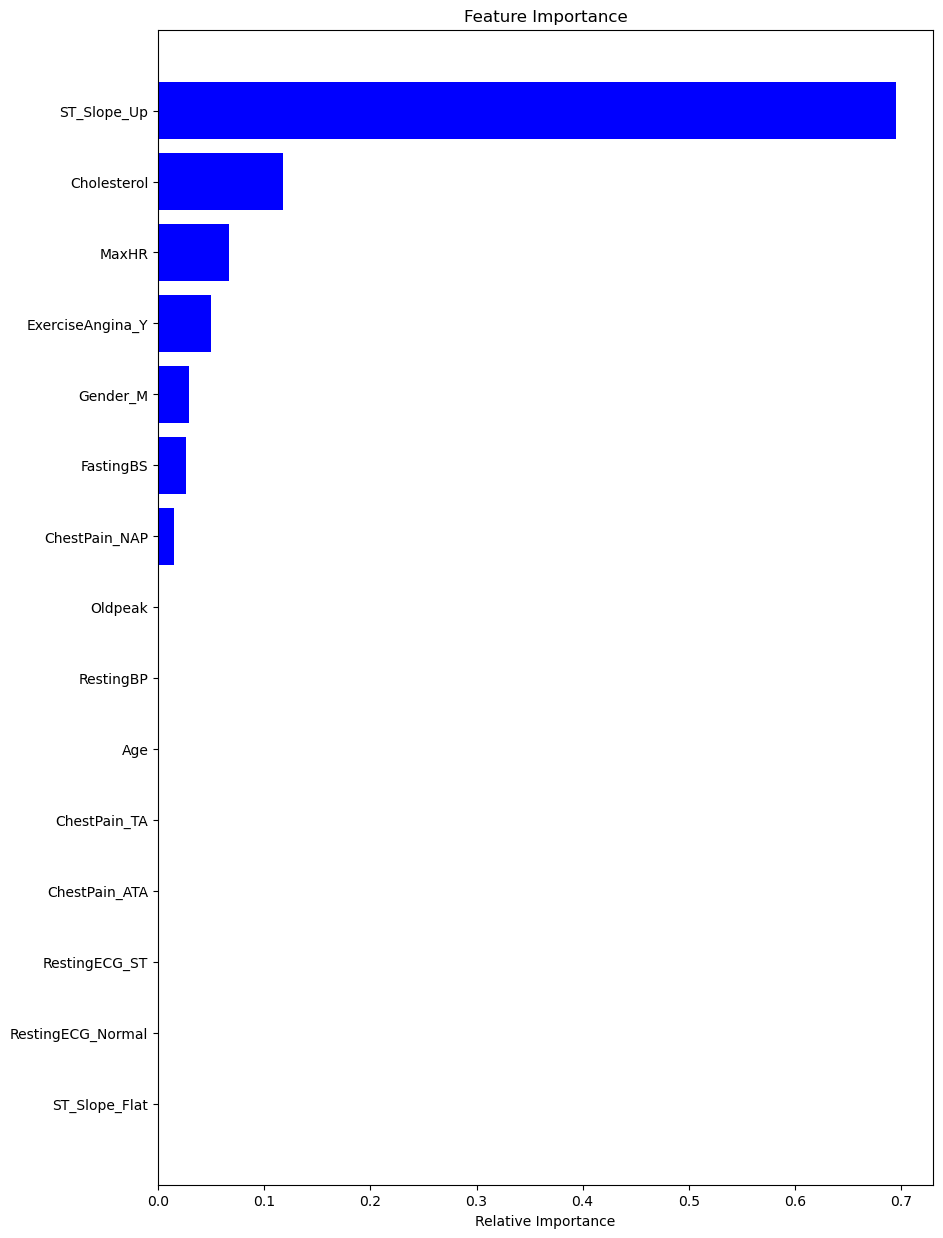

In [242]:
plt.figure(figsize=(10,15))
plt.title('Feature Importance')
plt.barh(range(len(indices)), imp[indices], align = 'center',color = 'Blue')
plt.yticks(range(len(indices)),[feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Hyperparameters tuning

In [268]:
params = {'max_depth' : [3,5,9,10,15],
          'criterion':['gain','entropy']}

In [270]:
## hyperparameters tuning
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(model, param_distributions= params)
rscv.fit(X_train, y_train)

D:\Users\Happy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\Happy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\Happy\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Users\Happy\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Users\Happy\anaconda3\Lib\site-packages\

RandomizedSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
                   param_distributions={'criterion': ['gain', 'entropy'],
                                        'max_depth': [3, 5, 9, 10, 15]})

In [272]:
rscv.best_params_

{'max_depth': 5, 'criterion': 'entropy'}

In [274]:
rscv.best_score_

0.8446836268754077

In [276]:
from sklearn.model_selection import GridSearchCV
gscv = GridSearchCV(model, param_grid = params)
gscv.fit(X_train,y_train)

D:\Users\Happy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\Happy\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\Happy\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Users\Happy\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Users\Happy\anaconda3\Lib\site-packages\

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gain', 'entropy'],
                         'max_depth': [3, 5, 9, 10, 15]})

In [278]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [280]:
gscv.best_score_

0.8460441710930947

In [287]:
model = DecisionTreeClassifier(max_depth=5, criterion = 'entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [291]:
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8532608695652174

In [295]:
y_pred_train = model.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.8869209809264306

In [297]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        81
           1       0.90      0.83      0.86       103

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



In [299]:
import joblib

In [301]:
joblib.dump(model,"decision_tree_model.pkl")

['decision_tree_model.pkl']

### Gradio Interface

In [306]:
! pip install gradio

     ---------------------------------------- 0.0/43.0 kB ? eta -:--:--
     ---------------------------------------- 43.0/43.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/54.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/54.2 MB 3.8 MB/s eta 0:00:15
   ---------------------------------------- 0.3/54.2 MB 2.6 MB/s eta 0:00:21
   ---------------------------------------- 0.5/54.2 MB 3.2 MB/s eta 0:00:17
    --------------------------------------- 0.8/54.2 MB 4.0 MB/s eta 0:00:14
   - -------------------------------------- 1.6/54.2 MB 6.6 MB/s eta 0:00:08
   - -------------------------------------- 2.7/54.2 MB 9.4 MB/s eta 0:00:06
   -- ------------------------------------- 3.9/54.2 MB 11.8 MB/s eta 0:00:05
   ---- ----------------------------------- 5.7/54.2 MB 15.2 MB/s eta 0:00:04
   ----- ---------------------------------- 7.6/54.2 MB 17.9 MB/s eta 0:00:03
   ------- -------------------------------- 9.5/54.2 MB 19.6 MB/s eta 0:00:03
   -

In [310]:
import gradio as gr
import numpy as np

def predict_heart_disease(Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, 
                          RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope):
    # Manual dummy variable encoding (match your model training)
    
    # Binary encodings
    Sex_M = 1 if Sex == "M" else 0
    FastingBS_val = int(FastingBS)  # already 0 or 1
    ExerciseAngina_Y = 1 if ExerciseAngina == "Y" else 0

    # ChestPainType (4 types → 3 dummy vars assuming one dropped or 4 if not)
    ChestPain_ASY = 1 if ChestPainType == "ASY" else 0
    ChestPain_ATA = 1 if ChestPainType == "ATA" else 0
    ChestPain_NAP = 1 if ChestPainType == "NAP" else 0
    ChestPain_TA = 1 if ChestPainType == "TA" else 0  # Only include if used in model

    # RestingECG
    RestingECG_ST = 1 if RestingECG == "ST" else 0
    RestingECG_LVH = 1 if RestingECG == "LVH" else 0

    # ST_Slope
    ST_Slope_Flat = 1 if ST_Slope == "Flat" else 0
    ST_Slope_Up = 1 if ST_Slope == "Up" else 0

    # Form the input in model's expected order (15 features)
    input_data = np.array([[Age, Sex_M, ChestPain_ASY, ChestPain_ATA, ChestPain_NAP,
                            RestingBP, Cholesterol, FastingBS_val, RestingECG_ST, RestingECG_LVH,
                            MaxHR, ExerciseAngina_Y, Oldpeak, ST_Slope_Flat, ST_Slope_Up]])
    
    prediction = model.predict(input_data)
    return "At Risk" if prediction[0] == 1 else "Not at Risk"

# Gradio UI
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Dropdown(["M", "F"], label="Sex"),
        gr.Dropdown(["ASY", "ATA", "NAP", "TA"], label="Chest Pain Type"),
        gr.Number(label="Resting Blood Pressure"),
        gr.Number(label="Cholesterol"),
        gr.Dropdown(["0", "1"], label="Fasting Blood Sugar > 120 mg/dl"),
        gr.Dropdown(["Normal", "ST", "LVH"], label="Resting ECG"),
        gr.Number(label="Maximum Heart Rate"),
        gr.Dropdown(["Y", "N"], label="Exercise-Induced Angina"),
        gr.Number(label="Oldpeak"),
        gr.Dropdown(["Up", "Flat", "Down"], label="ST Slope")
    ],
    outputs="text",
    title="Heart Disease Risk Predictor",
    description="Enter the values to predict the risk of heart disease."
)

iface.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.
